**Задание 1: Векторизация текста с использованием Мешка слов (BoW) и TF-IDF**

1. Создайте корпус из минимум 10 текстовых документов (можно взять новостные статьи, отзывы на товары, статьи по одной тематике).
2. Реализуйте предобработку текста, включающую:
* Приведение к нижнему регистру
* Токенизацию
* Удаление стоп-слов и пунктуации
* Лемматизацию/стемминг
3. Реализуйте модель Мешка слов (BoW) с использованием CountVectorizer из scikit-learn.
4. Реализуйте модель TF-IDF с использованием TfidfVectorizer из scikit-learn.
5. Найдите 10 самых значимых терминов для каждого документа по обоим подходам и сравните результаты.
6. Визуализируйте сходство документов с помощью метрики косинусного расстояния для обоих подходов.
7. Прокомментируйте разницу в результатах между BoW и TF-IDF

In [195]:
# ваш код

corpus = ["""Tour was great to learn the areas and the food was plentiful. Lots of local hole in the wall places i would not have found on my own along with explination of what is happening post covid to the city.""",
          """Our host Andre was the best! His knowledge of Chinatown and North Beach is exceptional. This was a wonderful introduction to Chinatown and north Beach locations and restaurants. We have been here before but Andre’s insight and stories made it all seem new. The portions were generous and a variety of stops. Especially loved the fortune cookie shop and the tea room. Don’t forget to wear comfy shoes and wish for the type of weather we had today.""",
          """I cannot describe how much we absolutely LOVED this tour. Myself and two friends had the absolute BEST time. We had a very interactive group! Heard some amazing stories. And thoroughly enjoyed all the food. We loved this! We would do it again for sure.""",
          """The tour was amazing. I like the fact that it was not only a food tour but it was also provided history and insight on Chinatown & North Beach. The food, chef kiss, great portions. Highlight was the tea shop. Learning about different teas. Really enjoyed our tour guide Ryan. He is down to earth & really cool. Felt like hanging out with a friend.""",
          """We loved this tour! We got a taste of Chinatown and Little Italy (North Beach). We learned some history, saw some local shops, and ate a great variety of delicious food. An added surprise was the tour of a local theatre! I would highly recommend this tour!""",
          """We had an amazing experience with our tour guide Brian. He's a neighborhood legend and gave us an in-depth perspective of the neighborhoods, their culture, and history, always with a quick joke and sense of humor. The food was all spectacular, and an incredible amount of bites for the price. I live in the Bay Area (my family was visiting from the east coast) and I learned so much about the city I never knew. The atmosphere and friendly vibe of the tour made for a fantastic day and we'd happily go again!""",
          """We had a wonderful time on our China Town /North Beach walking food tour. Our guide was knowledgeable friendly and took great pride and care with our entire group of attendees. You definitely should NOT eat breakfast before you begin. You will be stuffed by the end. We definitely recommend!""",
          """Huge thanks to Brian for an unforgettable day in San Francisco. It’s rare to find a guide who is so genuinely knowledgeable and funny. He went out of his way to make sure we had a great experience and took us to some amazing food spots. We left with full stomachs and great memories. 10/10!""",
          """This was by far the best walking tour I’ve ever experienced. Scott was extremely knowledgeable about the city. His tour solidified what he told us in the beginning…he loves San Francisco. I hung on every word he said. I can’t wait to take another one of his tours the next time I’m in San Francisco. I’m also going to buy his book. Great job, Scott!""",
          """This food tour was truly outstanding! A huge part of that was our incredible tour guide (Scott!), who was deeply connected to the neighborhood and brought Chinatown and North Beach to life with fascinating history and personal stories. The restaurant owners were welcoming and genuinely friendly, making each stop feel special and authentic. The food samples were both delicious and generous, and by the end we were happily full. Every detail felt thoughtful, and the experience was without question worth every penny."""
]

for i, doc in enumerate(corpus, 1):
    print(f"Текст {i}: {doc}")

Текст 1: Tour was great to learn the areas and the food was plentiful. Lots of local hole in the wall places i would not have found on my own along with explination of what is happening post covid to the city.
Текст 2: Our host Andre was the best! His knowledge of Chinatown and North Beach is exceptional. This was a wonderful introduction to Chinatown and north Beach locations and restaurants. We have been here before but Andre’s insight and stories made it all seem new. The portions were generous and a variety of stops. Especially loved the fortune cookie shop and the tea room. Don’t forget to wear comfy shoes and wish for the type of weather we had today.
Текст 3: I cannot describe how much we absolutely LOVED this tour. Myself and two friends had the absolute BEST time. We had a very interactive group! Heard some amazing stories. And thoroughly enjoyed all the food. We loved this! We would do it again for sure.
Текст 4: The tour was amazing. I like the fact that it was not only a fo

In [196]:
#библиотеки
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt_tab')

nlp_en = spacy.load("en_core_web_sm")

nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [197]:
#нормализация
#Приведение к нижнему регистру
#Токенизацию
#Удаление стоп-слов и пунктуации
#Лемматизацию/стемминг

for i in range(len(corpus)):

    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'[^\w\s]', '', corpus[i])
    tokens = [t for t in word_tokenize(corpus[i]) if t not in english_stopwords]
    doc = nlp_en(" ".join(tokens))
    lemmas = [token.lemma_ for token in doc if token.is_alpha]
    corpus[i] = " ".join(lemmas)

print("Предобработанные тексты:")
for i, doc in enumerate(corpus, 1):
    print(f"Текст {i}: {doc}")

Предобработанные тексты:
Текст 1: tour great learn area food plentiful lot local hole wall place would find along explination happen post covid city
Текст 2: host andre good knowledge chinatown north beach exceptional wonderful introduction chinatown north beach location restaurant andre insight story make seem new portion generous variety stop especially love fortune cookie shop tea room do not forget wear comfy shoe wish type weather today
Текст 3: describe much absolutely love tour two friend absolute good time interactive group hear amazing story thoroughly enjoy food love would sure
Текст 4: tour amazing like fact food tour also provide history insight chinatown north beach food chef kiss great portion highlight tea shop learn different tea really enjoy tour guide ryan earth really cool feel like hang friend
Текст 5: love tour get taste chinatown little italy north beach learn history see local shop eat great variety delicious food add surprise tour local theatre would highly reco

In [198]:
#bagofwords
#Реализуйте модель Мешка слов (BoW) с использованием CountVectorizer из scikit-learn.

count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(corpus)
feature_names = count_vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=feature_names,
    index=[f'Текст {i+1}' for i in range(len(corpus))]
)

print("Матрица Bag of Words:")
print(bow_df)

Матрица Bag of Words:
          absolute  absolutely  add  along  also  always  amazing  amount  \
Текст 1          0           0    0      1     0       0        0       0   
Текст 2          0           0    0      0     0       0        0       0   
Текст 3          1           1    0      0     0       0        1       0   
Текст 4          0           0    0      0     1       0        1       0   
Текст 5          0           0    1      0     0       0        0       0   
Текст 6          0           0    0      0     0       1        1       1   
Текст 7          0           0    0      0     0       0        0       0   
Текст 8          0           0    0      0     0       0        1       0   
Текст 9          0           0    0      0     1       0        0       0   
Текст 10         0           0    0      0     0       0        0       0   

          andre  another  ...  we  wear  weather  welcome  wish  without  \
Текст 1       0        0  ...   0     0        0      

In [199]:
#tfidf
#Реализуйте модель TF-IDF с использованием TfidfVectorizer из scikit-learn.

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=[f'Текст {i+1}' for i in range(len(corpus))]
)

print("Матрица TF-IDF:")
print(tfidf_df)

Матрица TF-IDF:
          absolute  absolutely       add    along      also    always  \
Текст 1   0.000000    0.000000  0.000000  0.26358  0.000000  0.000000   
Текст 2   0.000000    0.000000  0.000000  0.00000  0.000000  0.000000   
Текст 3   0.254774    0.254774  0.000000  0.00000  0.000000  0.000000   
Текст 4   0.000000    0.000000  0.000000  0.00000  0.152291  0.000000   
Текст 5   0.000000    0.000000  0.220324  0.00000  0.000000  0.000000   
Текст 6   0.000000    0.000000  0.000000  0.00000  0.000000  0.156898   
Текст 7   0.000000    0.000000  0.000000  0.00000  0.000000  0.000000   
Текст 8   0.000000    0.000000  0.000000  0.00000  0.000000  0.000000   
Текст 9   0.000000    0.000000  0.000000  0.00000  0.141499  0.000000   
Текст 10  0.000000    0.000000  0.000000  0.00000  0.000000  0.000000   

           amazing    amount     andre   another  ...        we      wear  \
Текст 1   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
Текст 2   0.000000  0.0000

In [200]:
#top10
#Найдите 10 самых значимых терминов для каждого документа по обоим подходам и сравните результаты.

print("Топ‑10 слова по BOW и TF-IDF, и их сравнение для каждого текста:\n\n")
for doc_idx in range(len(corpus)):

  print(f"Текст {doc_idx + 1}:\n")

  doc_bow = bow_matrix[doc_idx].toarray().flatten()
  word_scores = dict(zip(count_vectorizer.get_feature_names_out(), doc_bow))
  top_bow_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:10]
  print("Топ‑10 слов по BOW:")
  for word, count in top_bow_words:
    print(f"- {word}: {count} раз")
  print()

  doc_tfidf = tfidf_matrix[doc_idx].toarray().flatten()
  word_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), doc_tfidf))
  top_tfidf_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:10]
  print("Топ‑10 слов по TF‑IDF:")
  for word, score in top_tfidf_words:
    print(f"- {word}: {score:.4f}")
  print()

  bow_words = [word for word, _ in top_bow_words]
  tfidf_words = [word for word, _ in top_tfidf_words]

  common_words = set(bow_words) & set(tfidf_words)
  bow_only = set(bow_words) - common_words
  tfidf_only = set(tfidf_words) - common_words

  print("Сравнение топ-10 слов:")

  if common_words:
      print(f"Общие слова в обоих топ-10: {', '.join(sorted(common_words))}")
  else:
      print("Общих слов в топ‑10 нет")
  if bow_only:
      print(f"Только в BOW топ-10: {', '.join(sorted(bow_only))}")
  else:
      print("Нет уникальных слов в BOW топ‑10")
  if tfidf_only:
      print(f"Только в TF-IDF топ-10: {', '.join(sorted(tfidf_only))}\n\n")
  else:
      print("Нет уникальных слов в TF‑IDF топ‑10\n\n")

Топ‑10 слова по BOW и TF-IDF, и их сравнение для каждого текста:


Текст 1:

Топ‑10 слов по BOW:
- along: 1 раз
- area: 1 раз
- city: 1 раз
- covid: 1 раз
- explination: 1 раз
- find: 1 раз
- food: 1 раз
- great: 1 раз
- happen: 1 раз
- hole: 1 раз

Топ‑10 слов по TF‑IDF:
- along: 0.2636
- covid: 0.2636
- explination: 0.2636
- happen: 0.2636
- hole: 0.2636
- lot: 0.2636
- place: 0.2636
- plentiful: 0.2636
- post: 0.2636
- wall: 0.2636

Сравнение топ-10 слов:
Общие слова в обоих топ-10: along, covid, explination, happen, hole
Только в BOW топ-10: area, city, find, food, great
Только в TF-IDF топ-10: lot, place, plentiful, post, wall


Текст 2:

Топ‑10 слов по BOW:
- andre: 2 раз
- beach: 2 раз
- chinatown: 2 раз
- north: 2 раз
- comfy: 1 раз
- cookie: 1 раз
- do: 1 раз
- especially: 1 раз
- exceptional: 1 раз
- forget: 1 раз

Топ‑10 слов по TF‑IDF:
- andre: 0.3261
- chinatown: 0.2156
- beach: 0.1937
- north: 0.1937
- comfy: 0.1631
- cookie: 0.1631
- do: 0.1631
- especially: 0.1631
- exc

In [201]:
bow_sum = np.sum(bow_matrix.toarray(), axis=0)
word_bow_dict = dict(zip(feature_names, bow_sum))
top_bow_words = sorted(word_bow_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Топ-3 слова по всей коллекции ===\n")
print("Топ-3 слова по BOW (самые частые в коллекции):")
for word, count in top_bow_words:
    print(f"- {word}: {count} раз")

tfidf_sum = np.sum(tfidf_matrix.toarray(), axis=0)
word_tfidf_dict = dict(zip(feature_names, tfidf_sum))
top_tfidf_words = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nТоп-3 слова по TF-IDF (с наибольшим весом по всей коллекции):")
for word, score in top_tfidf_words:
    print(f"- {word}: {score:.4f}")

print("\nСравнение топ-3 слов:")
bow_words = [word for word, _ in top_bow_words]
tfidf_words = [word for word, _ in top_tfidf_words]

common_words = set(bow_words) & set(tfidf_words)
bow_only = set(bow_words) - common_words
tfidf_only = set(tfidf_words) - common_words

if common_words:
    print(f"Общие слова в обоих топ-3: {', '.join(common_words)}")
if bow_only:
    print(f"Только в BOW топ-3: {', '.join(bow_only)}")
if tfidf_only:
    print(f"Только в TF-IDF топ-3: {', '.join(tfidf_only)}")

=== Топ-3 слова по всей коллекции ===

Топ-3 слова по BOW (самые частые в коллекции):
- tour: 16 раз
- food: 10 раз
- great: 7 раз
- beach: 6 раз
- north: 6 раз
- chinatown: 5 раз
- guide: 5 раз
- love: 5 раз
- amazing: 4 раз
- experience: 4 раз

Топ-3 слова по TF-IDF (с наибольшим весом по всей коллекции):
- tour: 1.3597
- food: 0.8908
- great: 0.7975
- love: 0.7005
- beach: 0.6535
- north: 0.6535
- local: 0.5987
- chinatown: 0.5844
- guide: 0.5526
- would: 0.5494

Сравнение топ-3 слов:
Общие слова в обоих топ-3: chinatown, beach, tour, food, north, great, love, guide
Только в BOW топ-3: experience, amazing
Только в TF-IDF топ-3: would, local


Визуализация сходства текстов:



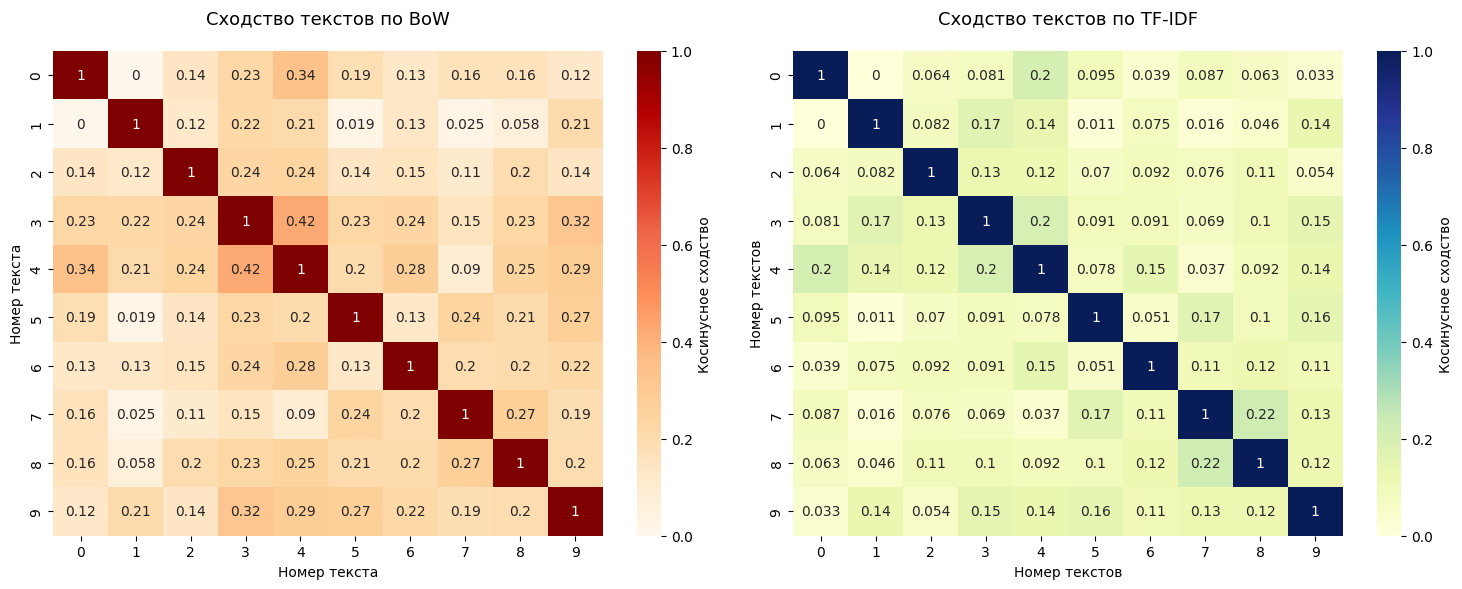

In [202]:
#Визуализируйте сходство документов с помощью метрики косинусного расстояния для обоих подходов.

print("Визуализация сходства текстов:\n")

bow_cosine_sim = cosine_similarity(bow_matrix)
tfidf_cosine_sim = cosine_similarity(tfidf_matrix)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(bow_cosine_sim, annot=True, cmap='OrRd',
            ax=axes[0],cbar_kws={'label': 'Косинусное сходство'})
axes[0].set_title('Сходство текстов по BoW', fontsize=13, pad=20)
axes[0].set_xlabel('Номер текста')
axes[0].set_ylabel('Номер текста')


sns.heatmap(tfidf_cosine_sim, annot=True, cmap='YlGnBu',
            ax=axes[1], cbar_kws={'label': 'Косинусное сходство'})
axes[1].set_title('Сходство текстов по TF-IDF', fontsize=13, pad=20)
axes[1].set_xlabel('Номер текстов')
axes[1].set_ylabel('Номер текстов')

plt.tight_layout()
plt.show()

# Разница в результатах между BoW и TF-IDF

BoW выделяет наиболее частотные слова (tour – встречается 16 раз в текстах, food – 10 раз, great – 7 раз), которые мало говорят о специфике отзывов. TF-IDF же выделяет более содержательные слова, которые отражают характер каждого отзыва. Так, в 5 тексте слова "surprise" по TF-IDF отпределяется как важное. В отзыве говорится, что сюрпризом тура стал местный театр, который не упоминается в других текстах. TF-IDF также выделяет "theatre" (в отличие от BoW), если брать не топ-10, а топ-11.

**Задание 2: Морфологическая разметка текста**

1. Возьмите отрывок текста (минимум 300 слов) на русском и английском языке.
2. Для русского языка используйте PyMorphy2 или PyMorphy3, для английского - NLTK или SpaCy для проведения морфологического анализа.
3. Выполните следующие операции:
* Определите части речи для каждого слова в тексте
* Для существительных определите падеж, род и число
* Для глаголов определите время, лицо и число
* Создайте частотный словарь частей речи в тексте
4. Разработайте функцию, которая будет автоматически изменять текст, заменяя все существительные на их форму множественного числа (где возможно).
5. Результаты морфологического анализа должны быть представлены в виде таблицы.
6. Оцените и прокомментируйте точность определения морфологических характеристик

In [203]:
# ваш код

en_text = """Coriolanus released the fistful of cabbage into the pot of boiling water and swore that one day it would never pass his lips again. But this was not that day. He
needed to eat a large bowl of the anemic stuff, and drink every drop of broth, to prevent his stomach from growling during the reaping ceremony. It was one of a long list of
precautions he took to mask the fact that his family, despite residing in the penthouse of the Capitol’s most opulent apartment building, was as poor as district scum. That
at eighteen, the heir to the once-great house of Snow had nothing to live on but his wits.

His shirt for the reaping was worrying him. He had an acceptable pair of dark dress pants bought on the black market last year, but the shirt was what people looked at. Fortunately,
the Academy provided the uniforms it required for daily use. For today’s ceremony, however, students were instructed to be dressed fashionably but with the solemnity the occasion
dictated. Tigris had said to trust her, and he did. Only his cousin’s cleverness with a needle had saved him so far. Still, he couldn’t expect miracles.

The shirt they’d dug from the back of the wardrobe — his father’s, from better days — was stained and yellowed with age, half the buttons missing, a cigarette burn on one cuff. Too
damaged to sell in even the worst of times, and this was to be his reaping shirt? This morning he had gone to her room at daybreak, only to find both his cousin and the shirt missing.
Not a good sign. Had Tigris given up on the old thing and braved the black market in some last-ditch effort to find him proper clothing? And what on earth would she possess worth
trading for it? Only one thing — herself — and the house of Snow had not yet fallen that far. Or was it falling now as he salted the cabbage?

He thought of people putting a price on her. With her long, pointed nose and skinny body, Tigris was no great beauty, but she had a sweetness, a vulnerability that invited abuse. She
would find takers, if she had a mind to. The idea made him feel sick and helpless and, consequently, disgusted with himself.
From deep in the apartment he heard the recording of the Capitol anthem, “Gem of Panem,” kick on. His grandmother’s tremulous soprano voice joined in, bouncing off the walls.

Gem of Panem,
Mighty city,
Through the ages, you shine anew.

As always, she was painfully off-key and slightly behind tempo. The first year of the war, she’d played the recording on national holidays for five-year-old Coriolanus and
eight-year-old Tigris in order to build their sense of patriotism. The daily recital hadn’t begun until that black day when the district rebels had surrounded the Capitol, cutting it
off from supplies for the remaining two years of the war. “Remember, children,” she’d say, “we are but besieged — we have not surrendered!” Then she would warble the anthem out of the
penthouse window as the bombs rained down. Her small act of defiance.
"""
ru_text = """Помню просторный грязный двор и низкие домики, обнесенные забором. Двор сеял у самой реки, и по веснам, когда спадала полая вода, он был усеян щепой и ракушками,
а иногда и другими, куда более интересными вещами. Так, однажды мы нашли туго набитую письмами сумку, а потом вода принесла и осторожно положила на берег я самого почтальона.
Он лежал на спине, закинув руки, как будто заслонясь от солнца, еще совсем молодой, белокурый, в форменной тужурке с блестящими пуговицами: должно быть, отправляясь в свой
последний рейс, почтальон начистил их мелом.

Сумку отобрал городовой, а письма, так как они размокли и уже никуда не годились, взяла себе тетя Даша. Но они не совсем размокли: сумка была новая, кожаная и плотно запиралась.
Каждый вечер тетя Даша читала вслух по одному письму, иногда только мне, а иногда всему двору. Это было так интересно, что старухи, ходившие к Сковородникову играть в «козла»,
бросали карты и присоединялись к нам. Одно из этих писем тетя Даша читала чаще других - так часто, что, в конце концов, я выучил его наизусть. С тех пор прошло много лет, но я
еще помню его от первого до последнего слова.

«Глубокоуважаемая Мария Васильевна!
Спешу сообщить Вам, что Иван Львович жив и здоров. Четыре месяца тому назад
я, согласно его предписаниям, покинул шхуну, и со мной тринадцать человек команды.
Надеясь вскоре увидеться с Вами, не буду рассказывать о вашем тяжелом путешествии
на Землю Франца-Иосифа по плавучим льдам. Невероятные бедствия и лишения
приходилось терпеть. Скажу только, что из нашей группы я один благополучно (если не
считать отмороженных ног) добрался до мыса Флоры. «Св. Фока» экспедиции
лейтенанта Седова подобрал меня и доставил в Архангельск. Я остался жив, но
приходится, кажется, пожалеть об этом, так как в ближайшие дни мне предстоит
операция, после которой останется только уповать на милосердие Божие, а как я буду
жить без ног - не знаю. Но вот что я должен сообщить Вам: «Св. Мария» замерзла еще в
Карском море и с октября 1913 года беспрестанно движется на север вместе с
полярными льдами. Когда мы ушли, шхуна находилась на широте 82°55'. Она стоит
спокойно среди ледяного поля, или, вернее, стояла с осени 1913 года до моего ухода.
Может быть, она освободится и в этом году, но, по моему мнению, вероятнее, что в
будущем, когда она будет приблизительно в том месте, где освободился «Фрам».
Провизии у оставшихся еще довольно, и ее хватит до октября-ноября будущего года. Во
всяком случае, спешу Вас уверить, что мы покинули судно не потому, что положение его
безнадежно. Конечно, я должен был выполнить предписание командира корабля, но не
скрою, что оно шло навстречу моему желанию. Когда я с тринадцатью матросами
уходил с судна, Иван Львович вручил мне пакет на имя покойного теперь начальника
Гидрографического управления, и письмо для Вас. Не рискую посылать их почтой, потому
что оставшись один, дорожу каждым свидетельством моего честного поведения.
Поэтому прошу Вас прислать за ними или приехать лично в Архангельск, так как не менее
трех месяцев я должен провести в больнице. Жду Вашего ответа.
С совершенным уважением, готовый к услугам
штурман дальнего плавания И.Климов».

Адрес был размыт водой, но все же видно было, что он написан тем же твердым, прямым почерком на толстом пожелтевшем конверте.

Должно быть, это письмо стало для меня чем-то вроде молитвы, - каждый вечер я повторял его, дожидаясь, когда придет отец.
"""
en_word_count = len(en_text.split())
print('Количество слов в тексте на английском:', en_word_count)

ru_word_count = len(ru_text.split())
print('Количество слов в тексте на русском:', ru_word_count)

Количество слов в тексте на английском: 530
Количество слов в тексте на русском: 540


In [204]:
#библиотеки

!pip install pymorphy3 spacy nltk pandas

import re
import pandas as pd
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from collections import Counter
from pymorphy3 import MorphAnalyzer

nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [205]:
def normalize_text(text):
  text = text.lower()
  text = text.replace('\n', ' ')
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'[^\w\s]', ' ', text)
  text = ' '.join(text.split())
  return text

clean_text_ru = normalize_text(ru_text)
clean_text_en = normalize_text(en_text)

In [206]:
#функция
morph = MorphAnalyzer()

def analysis(text):

  words = [w for w in word_tokenize(text) if w.isalpha()]
  list_of_tagged = []
  pos_counts = Counter()

  for word in words:
      parsed = morph.parse(word)[0]
      pos = parsed.tag.POS if parsed.tag.POS is not None else "не указано"
      pos_counts[pos] += 1
      list_of_tagged.append(
          { "word": word,
            "pos": pos,
            "case": parsed.tag.case or "не указано",
            "gender": parsed.tag.gender or "не указано",
            "number": parsed.tag.number or "не указано",
            "tense": parsed.tag.tense or "не указано",
            "person": parsed.tag.person or "не указано"
          })
  return list_of_tagged, pos_counts

list_of_tagged_RU, pos_counts = analysis(clean_text_ru)

list_of_tagged_RU_df = pd.DataFrame(list_of_tagged_RU)
print("Результаты морфологического анализа:\n")
from IPython.display import display
display(list_of_tagged_RU_df)

print("\nЧастотность частей речи:\n")
for pos, count in pos_counts.items():
    print(f"{pos}: {count}")

Результаты морфологического анализа:



,word,pos,case,gender,number,tense,person
0,помню,VERB,не указано,не указано,sing,pres,1per
1,просторный,ADJF,nomn,masc,sing,не указано,не указано
2,грязный,ADJF,nomn,masc,sing,не указано,не указано
3,двор,NOUN,accs,masc,sing,не указано,не указано
4,и,CONJ,не указано,не указано,не указано,не указано,не указано
...,...,...,...,...,...,...,...
533,его,NPRO,accs,masc,sing,не указано,3per
534,дожидаясь,GRND,не указано,не указано,не указано,pres,не указано
535,когда,CONJ,не указано,не указано,не указано,не указано,не указано
536,придет,VERB,не указано,не указано,sing,futr,3per



Частотность частей речи:

VERB: 65
ADJF: 60
NOUN: 134
CONJ: 66
PRTF: 5
PREP: 57
NPRO: 49
PRTS: 2
ADVB: 42
GRND: 5
ADJS: 11
INFN: 19
PRCL: 16
COMP: 3
NUMR: 4


In [207]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [208]:
nlp_en = spacy.load("en_core_web_sm")

def analysis(text):

  doc = nlp_en(text)
  list_of_tagged = []
  pos_counts = Counter()

  for word in doc:
      if not word.is_alpha:
        continue
      m = word.morph
      pos = word.pos_ if word.pos_ is not None else "не указано"
      pos_counts[pos] += 1

      list_of_tagged.append(
          { "word": word,
            "pos": pos,
            "number": m.get("Number", ["не указано"])[0],
            "tense": m.get("Tense", ["не указано"])[0],
            "person": m.get("Person", ["не указано"])[0],
          })
  return list_of_tagged, pos_counts


list_of_tagged_EN, pos_counts = analysis(clean_text_en)

list_of_tagged_EN_df = pd.DataFrame(list_of_tagged_EN)
print("Результаты морфологического анализа:\n")
from IPython.display import display
display(list_of_tagged_EN_df)

print("\nЧастотность частей речи:\n")
for pos, count in pos_counts.items():
    print(f"{pos}: {count}")

Результаты морфологического анализа:



,word,pos,number,tense,person
0,coriolanus,NOUN,Sing,не указано,не указано
1,released,VERB,не указано,Past,не указано
2,the,DET,не указано,не указано,не указано
3,fistful,NOUN,Sing,не указано,не указано
4,of,ADP,не указано,не указано,не указано
...,...,...,...,...,...
537,her,PRON,Sing,не указано,3
538,small,ADJ,не указано,не указано,не указано
539,act,NOUN,Sing,не указано,не указано
540,of,ADP,не указано,не указано,не указано



Частотность частей речи:

NOUN: 132
VERB: 75
DET: 60
ADP: 69
CCONJ: 22
SCONJ: 9
NUM: 8
PRON: 56
AUX: 25
ADV: 26
PART: 18
ADJ: 35
PROPN: 6
INTJ: 1


In [209]:
#Разработайте функцию, которая будет автоматически изменять текст, заменяя все существительные на их форму множественного числа (где возможно).

def pluralize(text):
  words = [w for w in word_tokenize(text) if w.isalpha()]
  result = []

  for word in words:
    if word.isalpha():
      parsed = morph.parse(word)[0]
      if parsed.tag.POS == "NOUN":
        plural_nouns = parsed.inflect({"plur"})
        if plural_nouns:
          result.append(plural_nouns.word)
        else:
          result.append(word)
      else:
        result.append(word)
    else:
      result.append(word)
  new_text = " ".join(result)
  return new_text


plural_ru = pluralize(ru_text)
print("Изменённый текст:\n", plural_ru)

Изменённый текст:
 Помню просторный грязный дворы и низкие домики обнесенные заборами дворы сеял у самой рек и по вёснам когда спадала полая воды он был усеян щепами и ракушками а иногда и другими куда более интересными вещами Так однажды мы нашли туго набитую письмами сумки а потом воды принесла и осторожно положила на берега я самого почтальонов Он лежал на спинах закинув руки как будто заслоняси от солнц еще совсем молодой белокурый в форменной тужуркам с блестящими пуговицами должно быть отправляясь в свой последний рейсы почтальоны начистил их мелом сумки отобрал городовых а писем так как они размокли и уже никуда не годились взяла себе тёти даши Но они не совсем размокли сумки была новая кожаная и плотно запиралась Каждый вечера тёти даши читала вслух по одному письмам иногда только мне а иногда всему дворам Это было так интересно что старух ходившие к сковородниковым играть в козлов бросали карт и присоединялись к нам Одно из этих писем тёти даши читала чаще других так часто что

In [210]:
def pluralize(text):
  doc = nlp_en(text)
  result = []

  for word in doc:
    if (word.pos_ == "NOUN" and word.morph.get("Number", [''])[0] == "Sing"):
      lemma = word.lemma_
      if re.search(r'[bcdfghjklmnpqrstvwxyz]y$', lemma):
        plural_nouns = lemma[:-1] + 'ies'
      elif lemma.endswith(('s','sh','ch','z','x')):
        plural_nouns = lemma + "es"
      elif lemma.endswith('f'):
        plural_nouns = lemma[:-1] + "ves"
      elif lemma.endswith('fe'):
        plural_nouns = lemma[:-2] + "ves"
      else:
        plural_nouns = lemma + "s"

      result.append(plural_nouns)
    else:
      result.append(word.text)
  new_text = " ".join(result)
  new_text = re.sub(r'\s+([,.!?;:])', r'\1', new_text)
  new_text = re.sub(r'\s+', ' ', new_text)
  return new_text


plural_en = pluralize(en_text)
print("Изменённый текст:\n", plural_en)

Изменённый текст:
 coriolanuses released the fistfuls of cabbages into the pots of boilings waters and swore that one days it would never pass his lips again. But this was not that days. He needed to eat a large bowls of the anemic stufves, and drink every drops of broths, to prevent his stomaches from growling during the reapings ceremonies. It was one of a long lists of precautions he took to mask the facts that his families, despite residing in the penthouses of the Capitol ’s most opulent apartments buildings, was as poor as districts scums. That at eighteen, the heirs to the once - great houses of Snow had nothing to live on but his wits. His shirts for the reapings was worrying him. He had an acceptable pairs of dark dresses pants bought on the black markets last years, but the shirts was what people looked at. Fortunately, the Academy provided the uniforms it required for daily uses. For todays ’s ceremonies, however, students were instructed to be dressed fashionably but with t

# Точность определения морфологических характеристик
Русский тект (pymorphy3): в большинстве случаев часть речи и характеристики определяются правильно, ошибки редки (так, например слово "должно" определилось как прилагательное). Английский текст (spaCy): также в большинстве случаев часть речи и характеристики определяются правильно, однако ошибки встречаются чаще редки (так, например слова "boiling", "in order" определились как существительные). Pluralize выполняет свою работу, однако делает ошибки из-за неправильного определения части речи (надо дополнительно делить существительные на исчесляемые и неисчесляемые). Например, "boilings", "stufves", "sopranos", "cufves", "tempos", "in orders".

**Задание 3: Синтаксический анализ предложений**

1. Возьмите 2 простых и 3 сложных предложений на русском и английском языке (всего 10 предложений).
2. Используйте SpaCy для построения синтаксических деревьев этих предложений.
3. Для каждого предложения:
* Визуализируйте синтаксическое дерево
* Выделите все подлежащие и сказуемые
* Найдите все пары слов, связанные отношением определения (прилагательное-существительное)
4. Разработайте функцию для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект).
5. Объясните, какие трудности возникают при синтаксическом анализе сложных предложений

При синтаксическом анализе сложных предложений основной трудностью является правильное выделение подлежащего и сказуемого как в английских предложениях, так и в русских. Они могут быть выражены разными частями речи, быть составными, однородными и т.д. Для того, чтобы алгоритм справлялся со своей задачей на 100%, необходимо написать много правил. Также правильный синтаксический анализ зависит напрямую от правильного морфологического анализа. Если в последнем допущена ошибка, то и в первом она будет. Как в предложении "Костер мой погас" глагол "погас" был определен как существительное, соотвеетсвенно синтаксический анализ не выявил сказуемого там.

In [211]:
!python -m spacy download ru_core_news_md
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 19.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 15.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [212]:
nlp_en = spacy.load("en_core_web_md")
nlp_ru = spacy.load("ru_core_news_md")

In [213]:
# ваш код
ru_sentences = [
    "Костер мой погас.",
    "Холодный ветер задувал в окна.",
    "Сколько раз мы ждали его, купаясь, чтобы с размаху броситься в волны!",
    "Минька поразил меня, и я не сводил с него глаз всю дорогу.",
    "Я все не могу понять, как им удается сделать такой большой объем работы всего за два часа."
]
en_sentences = [
    "I really like the rainy weather.",
    "He brought a large bouquet of roses.",
    "When LucyGray began the lyrics, her voice was soft but clear as a bell.",
    "They asked me to sing because they thought Arachne and I were such great friends.",
    "His mother gave him the blue jacket and he wears it every day."
]

In [214]:
from spacy import displacy
for sentence in ru_sentences:
    doc_ru = nlp_ru(sentence)

    print(f"Sentence {ru_sentences.index(sentence)}")
    displacy.render(doc_ru, style="dep", jupyter=True, options={"distance": 100, "compact": True})


Sentence 0


Sentence 1


Sentence 2


Sentence 3


Sentence 4


In [215]:
for sentence in en_sentences:
    doc_en = nlp_en(sentence)

    print(f"Sentence {en_sentences.index(sentence)}")
    displacy.render(doc_en, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Sentence 0


Sentence 1


Sentence 2


Sentence 3


Sentence 4


In [216]:
def analysis_sentences(nlp, sentence):
  doc = nlp(sentence)
  subjects = []
  predicates = []
  adjnn = []

  for word in doc:
    if word.dep_ == "nsubj":
      subjects.append(word.text)
      for child in word.children:
        if child.dep_ == "conj":
          subjects.append(child.text)
    if word.pos_ in ["VERB", "AUX"]:
      if any(child.dep_ == "nsubj" for child in word.children):
        predicates.append(word.text)
      elif word.dep_ == "conj" and any(ancestor.pos_ in ["VERB", "AUX"] and any(c.dep_ == "nsubj" for c in ancestor.children) for ancestor in word.ancestors):
        predicates.append(word.text)
      elif word.dep_ == "ROOT":
        predicates.append(word.text)
    if word.dep_ == "amod" and word.head.pos_ == "NOUN":
      adjnn.append(f'{word.text} + {word.head.text}')

  return subjects, predicates, adjnn



for text in en_sentences:

    subject, predicate, adjnn = analysis_sentences(nlp_en, text)
    print(f"Предложение: {text}\n")
    print(f"Подлежащее: {subject}, \nСказуемое: {predicate}")
    print(f"Определения: {adjnn}\n")

for text in ru_sentences:

    subject, predicate, adjnn = analysis_sentences(nlp_ru, text)
    print(f"Предложение: {text}\n")
    print(f"Подлежащее: {subject}, \nСказуемое: {predicate}")
    print(f"Определения: {adjnn}\n")

Предложение: I really like the rainy weather.

Подлежащее: ['I'], 
Сказуемое: ['like']
Определения: ['rainy + weather']

Предложение: He brought a large bouquet of roses.

Подлежащее: ['He'], 
Сказуемое: ['brought']
Определения: ['large + bouquet']

Предложение: When LucyGray began the lyrics, her voice was soft but clear as a bell.

Подлежащее: ['LucyGray', 'voice'], 
Сказуемое: ['began', 'was']
Определения: []

Предложение: They asked me to sing because they thought Arachne and I were such great friends.

Подлежащее: ['They', 'they', 'Arachne', 'I'], 
Сказуемое: ['asked', 'thought', 'were']
Определения: ['such + friends', 'great + friends']

Предложение: His mother gave him the blue jacket and he wears it every day.

Подлежащее: ['mother', 'he'], 
Сказуемое: ['gave', 'wears']
Определения: ['blue + jacket']

Предложение: Костер мой погас.

Подлежащее: ['Костер'], 
Сказуемое: []
Определения: []

Предложение: Холодный ветер задувал в окна.

Подлежащее: ['ветер'], 
Сказуемое: ['задувал']

In [217]:
#Разработайте функцию для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект).
def svo_find(sentence, nlp):
  svo =[]
  doc = nlp(sentence)
  for word in doc:
    if word.dep_ in {"dobj", "iobj", "obj"}:
      obj = word.text
      predicate = word.head.text

      subj = None
      for child in word.head.children:
        if child.dep_ == "nsubj":
          subj = child.text
          break
      if subj is not None:
        svo.append((subj, predicate, obj))
        print(f"{subj} {predicate} {obj}")
  return svo

print("Английские предложения\n")
for sentence in en_sentences:
  svo_find(sentence, nlp_en)
print("\nРусские предложения\n")
for sentence in ru_sentences:
  svo_find(sentence, nlp_ru)

Английские предложения

I like weather
He brought bouquet
LucyGray began lyrics
They asked me
mother gave jacket
he wears it

Русские предложения

мы ждали его
Минька поразил меня
я сводил глаз
я сводил дорогу


**Задание 4: Распознавание именованных сущностей (Named Entity Recognition)**

1. Подготовьте корпус из 10 новостных текстов, содержащий различные типы именованных сущностей (имена людей, организации, географические названия, даты и т.д.) на английском или русском языке.
2. Используйте SpaCy для автоматического распознавания именованных сущностей.
3. Реализуйте свой простой метод для распознавания имен людей и географических названий с помощью регулярных выражений и словарей.
4. Сравните результаты работы SpaCy и вашего метода:
* Рассчитайте точность (precision), полноту (recall) и F1-меру для вашего метода относительно результатов SpaCy
* Проанализируйте ошибки обоих подходов, какие типы ошибок характерны для каждого подхода
5. Представьте сравнение результатов в виде таблицы

In [218]:
# ваш код
corpus = "corpus.txt"

with open(corpus, 'r', encoding='utf-8') as file:
    corpus = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(corpus)} символов")

Файл успешно прочитан. Длина текста: 5077 символов


In [219]:
def extract_entities(text, nlp, lang):
  doc = nlp(text)
  entities = [(ent.text, ent.label_) for ent in doc.ents]
  return entities

news_entities = extract_entities(corpus, nlp_en, "en")
only_en = list(set(news_entities))
news_entities_df = pd.DataFrame(only_en, columns = ["Слово", "Сущность"])
from IPython.display import display
display(news_entities_df)

,Слово,Сущность
0,Lady Kim Keon Hee,PERSON
1,US,GPE
2,three,CARDINAL
3,today,DATE
4,270,CARDINAL
...,...,...
82,The Beechcraft 1900D,ORG
83,Andromeda,ORG
84,the James Webb Space Telescope,ORG
85,25%,PERCENT


In [220]:
import string
def rule_based(text):
  entities = []
  words = word_tokenize(text, language='english')

  date_patterns = [r'\d{1,2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}',
                  r'\d{1,2}\s(?:января|февраля|марта|апреля|мая|июня|июля|августа|сентября|октября|ноября|декабря)\s\d{4}',
                  r'\d{1,2}/\d{1,2}/\d{4}',
                  r'\d{1,2}\.\d{1,2}\.\d{4}'
                  ]
  money_patterns = [r'\$\d+(?:,\d+)*(?:\.\d+)?',
                    r'\d+(?:,\d+)*(?:\.\d+)?\s(?:USD|EUR|GBP|RUB|руб\.|долларов|евро)',
                    r'\d+\s(?:млн|млрд|тыс\.)\s(?:USD|EUR|GBP|RUB|руб\.|долларов|евро)'
                    ]

  percent_patterns = [r'\b\d{1,3}(?:[.,]\d+)?\s?%',
                      r'\b\d{1,3}(?:[.,]\d+)?\s?(?:[-–—]\s?\d{1,3}(?:[.,]\d+)?)\s?%',
                      r'(?i)\b\d{1,3}(?:[.,]\d+)?\s?(?:проц(?:ент(?:а|ов)?)?|pct|percent)\b'
                      ]

  person_prefixes = {'Mr.', 'Mrs.', 'Dr.', 'Prof.', 'Ms.', 'Sir', 'Lord', 'President', 'Vice President', 'Prime Minister',
                    'King', 'Queen', 'Prince', 'Princess', 'General', 'Colonel', 'Major', 'Captain'}


  organizations = {'Apple', 'Google', 'Microsoft', 'Ministry of Transport', 'SpaceX', 'Sumitomo Forestry', 'NASA', 'FBI', 'Kyoto University',
                  'Samsung', 'Sony', 'JSW Group', 'MG Motor', 'Xiaomi', 'EU', 'NATO','World Bank', 'Amazon', 'Etsy',
                  'Bitfinex', 'LinkedIn'
                  }
  people = {'Kim Keon Hee', 'Donals Trump', 'Trump', 'Lichtenstein', 'Mohammed bin Rashid Al Maktoum', 'Elon Musk', 'Musk', 'Steve Jobs', 'Bill Gates',
            'Ed Sheeran', 'The Weeknd', 'Billie Eilish', 'Coldplay'}

  location_prefixes = {'in', 'at', 'from', 'to', 'near', 'inside', 'outside', 'around', 'within',
                      'into', 'onto', 'towards', 'via', 'between', 'across', 'over', 'under',
                       'through', 'behind', 'beside', 'by', 'along'
                      }
  email_patterns = [r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+']
  url_patterns = [r'(?i)\b(?:https?://|ftp://|www\.)[^\s<>"\']+',
                  r'(?i)\b(?:[a-z0-9-]+\.)+[a-z]{2,}(?:/[^\s<>"\']*)?'
                  ]

  for pattern in date_patterns:
      for match in re.finditer(pattern, text):
          entities.append((match.group(), 'DATE'))

    # Поиск денежных сумм
  for pattern in money_patterns:
      for match in re.finditer(pattern, text):
          entities.append((match.group(), 'MONEY'))

    # Поиск процентов
  for pattern in percent_patterns:
      for match in re.finditer(pattern, text):
          entities.append((match.group(), 'PERCENT'))

    # Поиск адреса электронной почты
  for pattern in email_patterns:
      for match in re.finditer(pattern, text):
          entities.append((match.group(), 'EMAIL'))

    # Поиск URL
  for pattern in url_patterns:
      for match in re.finditer(pattern, text):
          entities.append((match.group(), 'URL'))


  i = 0
  while i < len(words):
        # Поиск людей
      if i < len(words) - 1 and words[i] in person_prefixes:
            # Если слово после префикса начинается с заглавной буквы
          if words[i+1][0].isupper():
                # Собираем полное имя
              name_parts = []
              j = i + 1
              while j < len(words) and words[j][0].isupper() and words[j] not in string.punctuation:
                  name_parts.append(words[j])
                  j += 1
              if name_parts:
                  entities.append((' '.join([words[i]] + name_parts), 'PERSON'))
                  i = j
                  continue

        # Поиск организаций
      if words[i] in organizations:
          entities.append((words[i], 'ORGANIZATION'))


      if i < len(words) - 1 and words[i] in location_prefixes:
          if words[i+1][0].isupper():
              entities.append((words[i+1], 'LOCATION'))

      i += 1
  return entities


  # Протестируйте базовую и улучшенную реализации

improved_entities = rule_based(corpus)


print("\nУлучшенный NER:")
for e in improved_entities:
    print(e)


Улучшенный NER:
('$0.2068', 'MONEY')
('$35', 'MONEY')
('$2', 'MONEY')
('25%', 'PERCENT')
('SpaceX', 'ORGANIZATION')
('Donald', 'LOCATION')
('Dubai', 'LOCATION')
('NASA', 'ORGANIZATION')
('Bitfinex', 'LOCATION')
('Bitfinex', 'ORGANIZATION')
('LinkedIn', 'LOCATION')
('LinkedIn', 'ORGANIZATION')
('Unification', 'LOCATION')
('South', 'LOCATION')
('Ocana', 'LOCATION')


In [221]:
def compare(news_entities, improved_entities):
    def normalize(label):
        label = label.upper()
        if 'PERSON' in label or 'PER' in label:
            return 'PERSON'
        if 'GPE' in label or 'LOC' in label:
            return 'GPE'
        return label

    golden_standard = [(e[0].lower(), normalize(e[1]))
                    for e in news_entities if normalize(e[1]) in ['PERSON', 'GPE']]

    pred_entities = [(e[0].lower(), normalize(e[1]).split('_')[0])
                    for e in improved_entities if e[1].endswith('_RULE')]

    golden_set = set(golden_standard)
    pred_set = set(pred_entities)


    true_positives = len(pred_set.intersection(golden_set))
    false_positives = len(pred_set - golden_set)
    false_negatives = len(golden_set - pred_set)


    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'TP': true_positives, 'FP': false_positives, 'FN': false_negatives,
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1': round(f1, 3)
    }

metrics = compare(news_entities, improved_entities)
print("\nspaCy/rule-based\n")
metrics_df = pd.DataFrame([metrics]).T
metrics_df.columns = ['Значение']
from IPython.display import display
display(metrics_df)
comparison = []
for i in range(min(20, len(news_entities), len(improved_entities))):
    comp = {
        'SpaCy_text': news_entities[i][0],
        'SpaCy_label': news_entities[i][1],
        'Rule_text': improved_entities[i][0] if i < len(improved_entities) else 'Нет',
        'Rule_label': improved_entities[i][1] if i < len(improved_entities) else 'Нет',
        'Совпадение': 'Да' if i < min(len(news_entities), len(improved_entities)) and
                      news_entities[i][0].lower() == improved_entities[i][0].lower() else 'Нет'
    }
    comparison.append(comp)

comp_df = pd.DataFrame(comparison)
from IPython.display import display
display(comp_df)


spaCy/rule-based



,Значение
TP,0.0
FP,0.0
FN,21.0
Precision,0.0
Recall,0.0
F1,0.0


,SpaCy_text,SpaCy_label,Rule_text,Rule_label,Совпадение
0,China,GPE,$0.2068,MONEY,Нет
1,CR450,ORG,$35,MONEY,Нет
2,China,GPE,$2,MONEY,Нет
3,Ministry of Transport,ORG,25%,PERCENT,Нет
4,CR450,ORG,SpaceX,ORGANIZATION,Нет
5,450,CARDINAL,Donald,LOCATION,Нет
6,400,CARDINAL,Dubai,LOCATION,Нет
7,Shanghai,GPE,NASA,ORGANIZATION,Нет
8,Shanghai,GPE,Bitfinex,LOCATION,Нет
9,Pudong International Airport,FAC,Bitfinex,ORGANIZATION,Нет


In [222]:
#Сравните результаты работы SpaCy и вашего метода:
#Рассчитайте точность (precision), полноту (recall) и F1-меру для вашего метода относительно результатов SpaCy
#Проанализируйте ошибки обоих подходов, какие типы ошибок характерны для каждого подхода
#Представьте сравнение результатов в виде таблицы

SpaCy находит больше типов (DATE, ORG, MONEY), чем rule-based, но может допускать нарушение границ сущности (когда одна сущность выделяется как несколько).
Rule-based пропускает сущности, которых нет в словарях, но если есть в словаре, то определит точно. Может произойти конфликт меток, т.к. некоторые огранизации могут также считаться локациями.